In [1]:
#We are evaluating crime levels in Greater London between Jan 2011 and Dec 2014. The first step is to import necessary
#modules and run a function to pull month, year and borough values from csv files 
#We also drop unnecessary columns and create individual columns for each borough 

In [43]:
from __future__ import print_function, division
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import scipy.stats as stats
from scipy import stats
import math

In [3]:
#Testing for Hypothesis 1

#There has been no change in the occurence of robbery in Lambeth and Lewisham over time

In [4]:
#import values for crime = 'Robbery'

years = ['2011','2012','2013','2014']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

boroughs = ['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Elmbridge',
 'Enfield',
 'Epping Forest',
 'Epsom and Ewell',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hertsmere',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Reigate and Banstead',
 'Richmond upon Thames',
 'Sevenoaks',
 'Slough',
 'Southwark',
 'Spelthorne',
 'Sutton',
 'Tandridge',
 'Three Rivers',
 'Thurrock',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

crime="Robbery"
crime_df = pd.DataFrame()
for year in years:
    for month in months:
        df=pd.DataFrame()
        filename = f'/Users/mahimakaushiva/Desktop/Mod3Project/London Crime Data 2011 to 2014/{year}-{month}-metropolitan-street.csv'
        df = pd.read_csv(filename)
        df['Borough'] = df['LSOA name'].str[:-5]
        df['Location'] = df["Location"].str[11:]
        df=df.drop(columns=["Crime ID","Month","Reported by","Falls within","LSOA name","Last outcome category","Context"])
        for borough in boroughs:
            subset_df = df[(df["Crime type"]==crime)&(df["Borough"]==borough)]
            crime_df.loc[f'{year}-{month}',borough] = len(subset_df["Borough"])
crime_df.head()

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Elmbridge,...,Southwark,Spelthorne,Sutton,Tandridge,Three Rivers,Thurrock,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2011-01,80.0,95.0,25.0,175.0,58.0,134.0,1.0,176.0,127.0,0.0,...,191.0,0.0,25.0,0.0,0.0,0.0,110.0,161.0,109.0,199.0
2011-02,93.0,91.0,30.0,178.0,53.0,120.0,0.0,132.0,141.0,0.0,...,202.0,0.0,17.0,0.0,0.0,0.0,115.0,136.0,122.0,200.0
2011-03,112.0,99.0,62.0,179.0,63.0,113.0,0.0,145.0,107.0,0.0,...,211.0,0.0,20.0,0.0,0.0,0.0,124.0,158.0,120.0,192.0
2011-04,105.0,134.0,16.0,187.0,54.0,149.0,0.0,140.0,119.0,0.0,...,195.0,0.0,21.0,0.0,0.0,0.0,103.0,147.0,81.0,185.0
2011-05,86.0,106.0,24.0,212.0,53.0,149.0,0.0,136.0,120.0,0.0,...,211.0,0.0,38.0,0.0,0.0,0.0,146.0,144.0,130.0,226.0


In [5]:
#In order to test this hypothesis, we will compare the means of the two distributions to check if they are the same or not. 
#To do this, we will use a t-test. As variance between the two samples is not the same, we will use a Welch t-test 

In [6]:
#control group - la
lambeth=crime_df['Lambeth']
lambeth.head()

2011-01    257.0
2011-02    232.0
2011-03    240.0
2011-04    261.0
2011-05    276.0
Name: Lambeth, dtype: float64

In [7]:
la = np.array(lambeth)
la

array([257., 232., 240., 261., 276., 207., 299., 247., 235., 271., 249.,
       213., 272., 193., 233., 200., 181., 262., 230., 245., 213., 201.,
       247., 212., 229., 175., 218., 199., 199., 217., 273., 247., 195.,
       229., 161., 121., 164., 121., 128., 101.,  95., 110.,  95., 125.,
       115., 113., 108., 104.])

In [8]:
#experimental group - le
lewisham=crime_df['Lewisham']
lewisham.head()

2011-01    145.0
2011-02    149.0
2011-03    186.0
2011-04    123.0
2011-05    149.0
Name: Lewisham, dtype: float64

In [9]:
le = np.array(lewisham)
le

array([145., 149., 186., 123., 149., 128., 124., 139., 129., 142., 151.,
        92., 112.,  92., 114., 106., 128., 100., 120.,  83., 110., 107.,
       120., 128., 107., 117., 100.,  89., 108., 115., 128., 110., 119.,
       115., 107.,  80.,  81.,  63.,  56.,  58.,  42.,  65.,  85.,  71.,
        65.,  65.,  62.,  80.])

In [27]:
import testing_data as td

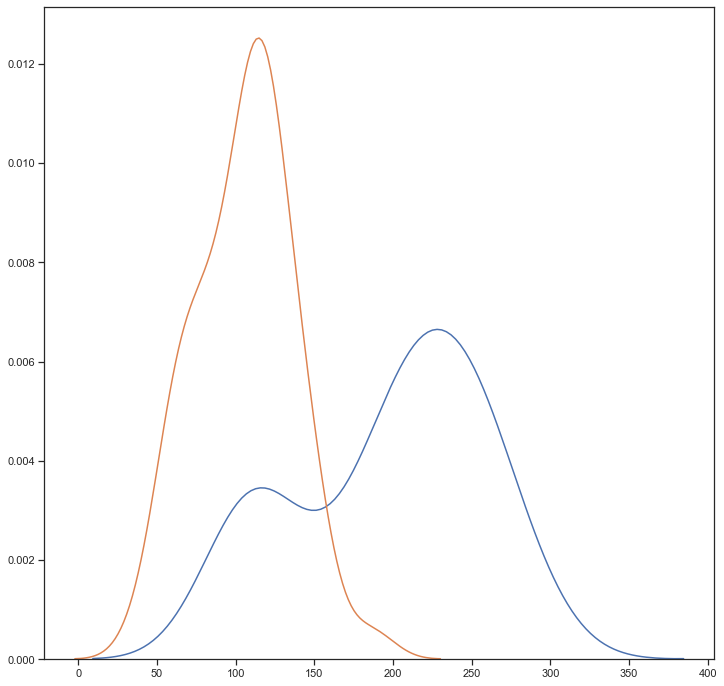

In [13]:
sns.set(color_codes=True)
sns.set_context("paper")
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("ticks")

sns.set_color_codes()
sns.distplot(la,hist=False) # Blue distribution
sns.distplot(le,hist=False) # Orange


# overlapping_density(package, input_vars, target_vars)

In [14]:
#We can see there is a much higher variance between the incidents of robbery
#in Lambeth vs Lewisham. 
# The means are also not the same, let's explore this further

In [15]:
#H0: The mean difference between the two groups is 0
#H1: The mean difference is not 0

In [16]:
#We use Welch's t-test to find out difference between the two means since variance of our samples is not the same

In [17]:
#calculating t-statistic from our function
t_stat = td.welch_t(la,le)
t_stat

9.75945932729967

In [19]:
#calculate degrees of freedom
robbery_df = td.welch_df(la,le)
robbery_df

70.29239884679747

In [20]:
td.p_val(la, le, two_sided=True)

1.0436096431476471e-14

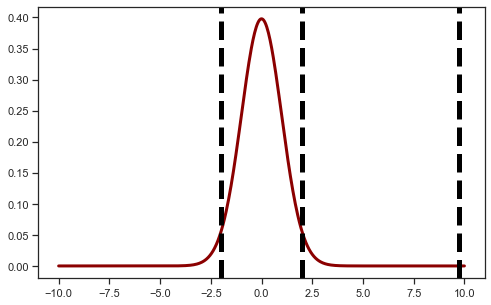

In [21]:
td.visualize_t(9.75,len(la),len(le))

In [ ]:
#for such a small p-value, we reject the null hypothesis

In [22]:
effect_size = td.Cohen_d(la,le)
effect_size

2.0132227404350864

In [29]:
# import scipy.stats as stats
# td.plot_pdfs(cohen_d=2.01)

In [ ]:
# Since the incidence of robbery in Lambeth have higher variance meaning the robberies were increasing and decreasing
# instead of consistently increasing over time. This could be because interventions 
# were more in number or they could have been more effective in curbing robbery as compared to 
#those in Lewisham. Since this is a retrospective analysis, we can also assess the possible causes 
# of higher robbery levels in Lewisham and the possible interventions in Lambeth. 

In [ ]:
#p value is significantly smaller than our alpha = 0.05
#In conclusion, we can say that there is a significant difference in the means between the two boroughs and we
#reject our null hypothesis 

In [31]:
#Testing for hypothesis 2

# Has anti-social behaviour gone up between Westminster and Croydon (H0: p1=p2)

#Antisocial behaviour includes:

# drunken or threatening behaviour
# vandalism and graffiti
# playing loud music at night

#import values for crime = anti-social behaviour

years = ['2011','2012','2013','2014']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

boroughs = ['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Elmbridge',
 'Enfield',
 'Epping Forest',
 'Epsom and Ewell',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hertsmere',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Reigate and Banstead',
 'Richmond upon Thames',
 'Sevenoaks',
 'Slough',
 'Southwark',
 'Spelthorne',
 'Sutton',
 'Tandridge',
 'Three Rivers',
 'Thurrock',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']
crime="Anti-social behaviour"
crime_df = pd.DataFrame()
for year in years:
    for month in months:
        df=pd.DataFrame()
        filename = f'/Users/mahimakaushiva/Desktop/Mod3Project/London Crime Data 2011 to 2014/{year}-{month}-metropolitan-street.csv'
        df = pd.read_csv(filename)
        df['Borough'] = df['LSOA name'].str[:-5]
        df['Location'] = df["Location"].str[11:]
        df=df.drop(columns=["Crime ID","Month","Reported by","Falls within","LSOA name","Last outcome category","Context"])
        for borough in boroughs:
            subset_df = df[(df["Crime type"]==crime)&(df["Borough"]==borough)]
            crime_df.loc[f'{year}-{month}',borough] = len(subset_df["Borough"])
crime_df.head()

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Elmbridge,...,Southwark,Spelthorne,Sutton,Tandridge,Three Rivers,Thurrock,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2011-01,801.0,1115.0,648.0,1156.0,1017.0,1308.0,0.0,1329.0,1435.0,2.0,...,1435.0,2.0,509.0,1.0,0.0,1.0,1400.0,1049.0,983.0,1756.0
2011-02,738.0,1031.0,618.0,1135.0,868.0,1221.0,0.0,1143.0,1389.0,1.0,...,1194.0,2.0,515.0,2.0,0.0,0.0,1401.0,1082.0,992.0,1613.0
2011-03,865.0,1276.0,624.0,1267.0,963.0,1242.0,0.0,1455.0,1549.0,2.0,...,1473.0,3.0,570.0,2.0,0.0,0.0,1611.0,1165.0,958.0,1838.0
2011-04,1115.0,1367.0,779.0,1391.0,1196.0,1290.0,0.0,1713.0,1734.0,3.0,...,1702.0,2.0,632.0,1.0,0.0,0.0,1910.0,1314.0,1252.0,2090.0
2011-05,1029.0,1312.0,809.0,1438.0,1070.0,1298.0,0.0,1669.0,1795.0,0.0,...,1600.0,4.0,646.0,0.0,0.0,0.0,1862.0,1235.0,1092.0,2136.0


In [ ]:
#In order to test this hypothesis, we will compare the means of the two distributions to check if they are the same or not. 
#To do this, we will use a t-test. As variance between the two samples is not the same, we will use a Welch t-test 

In [32]:
#control group - we
westminster=crime_df['Westminster']
westminster.head()

2011-01    1756.0
2011-02    1613.0
2011-03    1838.0
2011-04    2090.0
2011-05    2136.0
Name: Westminster, dtype: float64

In [33]:
we = np.array(westminster)
we

array([1756., 1613., 1838., 2090., 2136., 2111., 2222., 2032., 1654.,
       1864., 1672., 1473., 1475., 1483., 1720., 1605., 1833., 1780.,
       1921., 1953., 1607., 1696., 1270., 1196., 1135., 1136., 1325.,
       1273., 1537., 1551., 1665., 1581., 1170., 1566., 1424., 1342.,
       1177., 1133., 1301., 1265., 1421., 1522., 1472., 1396., 1454.,
       1370., 1320., 1154.])

In [34]:
#experimental group - cr
croydon=crime_df['Croydon']
croydon.head()

2011-01    1329.0
2011-02    1143.0
2011-03    1455.0
2011-04    1713.0
2011-05    1669.0
Name: Croydon, dtype: float64

In [35]:
cr = np.array(croydon)
cr

array([1329., 1143., 1455., 1713., 1669., 1475., 1686., 1794., 1123.,
       1262., 1030., 1007., 1088., 1077., 1247., 1121., 1330., 1387.,
       1418., 1564., 1270., 1170.,  863.,  817.,  818.,  844.,  951.,
        997., 1041., 1218., 1411., 1177.,  856., 1039.,  862.,  762.,
        746.,  624.,  663.,  810.,  856.,  899., 1051.,  847.,  761.,
        699.,  674.,  541.])

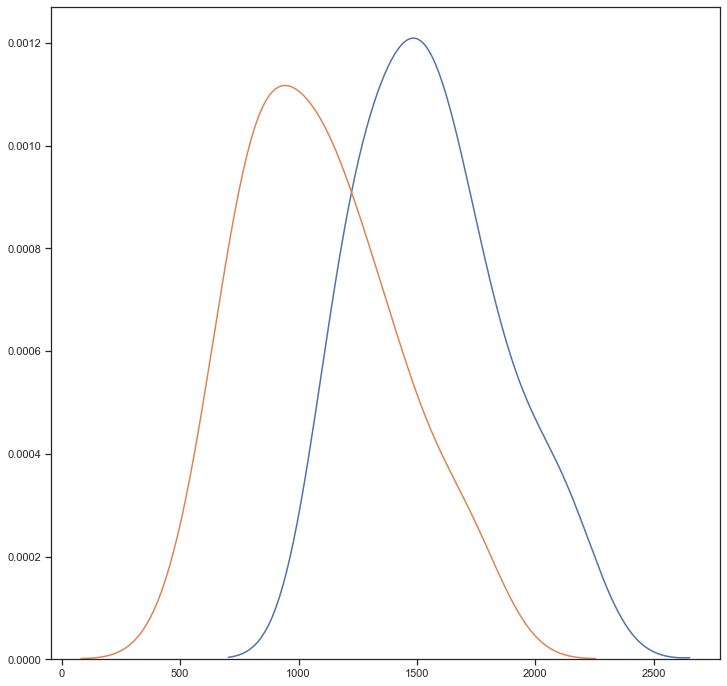

In [36]:
sns.set(color_codes=True)
sns.set_context("paper")
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("ticks")
sns.set_color_codes()
sns.distplot(we,hist=False) # Blue distribution
sns.distplot(cr,hist=False) # Orange

In [ ]:
#we can see a difference in the mean values and variance. Let's explore this further

In [ ]:
#Building our hypothesis 

#H0: there is no difference in the means of the two distributions1:
#H1: mean difference is not 0

In [ ]:
#We use Welch's t-test to find out difference between the two means since variance of our samples is not the same

In [37]:
#calculating t-statistic from our function
t_stat = td.welch_t(we,cr)
t_stat

7.569088014151234

In [38]:
#calculate degrees of freedom
asb_df = td.welch_df(we,cr)
asb_df

93.58168938678594

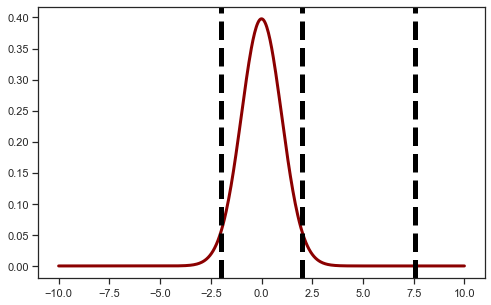

In [39]:
td.visualize_t(7.56,len(we),len(cr))

In [40]:
td.p_val(we, cr, two_sided=True)

2.58792987040124e-11

In [41]:
effect_size= td.Cohen_d(we,cr)
effect_size

1.5613836385196724

In [44]:
# td.plot_pdfs(cohen_d=1.56)

In [ ]:
#that is a high effect size possibly affected by the large difference in population of the two boroughs. Population 
#of Croydon is almost 66% more than that of Westminster. 
#Given how small the p value is, and less than our alpha = 0.05, we reject the null hypothesis and can conclude that 
#levels of anti-social behaviour varied between the two boroughs